In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from scipy.linalg import null_space

np.random.seed(10)

### Question 1

#### Part A

In [2]:
# construct transition matrix
pmat = np.zeros((3,3))

pmat[0,0] = 0.2
pmat[0,1] = 0.7
pmat[0,2] = 0.1

pmat[1,0] = 0.2
pmat[1,1] = 0.5
pmat[1,2] = 0.3

pmat[2,0] = 0.2
pmat[2,1] = 0.4
pmat[2,2] = 0.4

pmat

array([[0.2, 0.7, 0.1],
       [0.2, 0.5, 0.3],
       [0.2, 0.4, 0.4]])

#### Part B

In [3]:
# simulate one realization
num_sim_seq = 20
x_values = [1,2,3]

for i in np.arange(num_sim_seq):
    if i == 0:
        x_i = 1
    else:
        idx = x0 - 1
        p_tran = pmat[idx,:]
        x_i = np.random.choice(x_values, p=p_tran)
        
    print(f"x_{i} = {x_i}")
    x0 = x_i

x_0 = 1
x_1 = 2
x_2 = 1
x_3 = 2
x_4 = 3
x_5 = 2
x_6 = 2
x_7 = 1
x_8 = 2
x_9 = 1
x_10 = 1
x_11 = 2
x_12 = 3
x_13 = 1
x_14 = 2
x_15 = 3
x_16 = 3
x_17 = 3
x_18 = 2
x_19 = 3


### Question 2

#### Part A

In [4]:
## see written solutions

In [5]:
A = pmat.T - np.identity(3)
pi_inf = null_space(A)/np.sum(null_space(A))

print(pi_inf)

[[0.2       ]
 [0.51111111]
 [0.28888889]]


#### Part B

In [6]:
pi_0a = np.array([0.1,0.1,0.8])
pi_0b = np.array([0,1,0])

pi_inf = np.array([9/45, 23/45, 13/45])

In [7]:
def calculate_l2_norms(pi_0, pi_inf, pmat, num_realizations=10):

    results_list = []
    for i in np.arange(num_realizations+1):
        if i == 0:
            pi_i = pi_0

        # calculate l2 norm
        diff = pi_i - pi_inf
        l2_norm = np.linalg.norm(diff)
        results_list.append(l2_norm)

        # calculate next time step
        pi_i2 = np.matmul(np.transpose(pi_i), pmat)
        pi_i = pi_i2
        
    return results_list

In [8]:
results_a = calculate_l2_norms(pi_0a, pi_inf, pmat)
results_b = calculate_l2_norms(pi_0b, pi_inf, pmat)

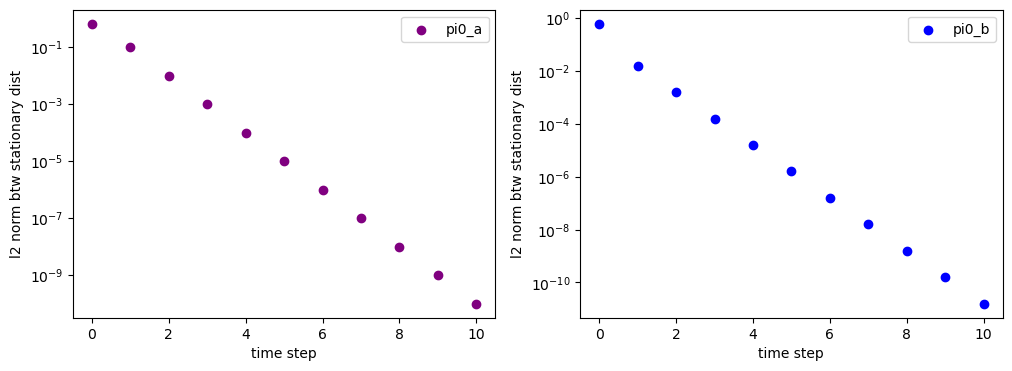

In [9]:
# plot results (use log scale)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes = axes.flatten()

axes[0].scatter(np.arange(len(results_a)), results_a, color='purple', label='pi0_a')
axes[1].scatter(np.arange(len(results_b)), results_b, color='blue', label='pi0_b')

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[0].legend()
axes[1].legend()

axes[0].set_xlabel('time step')
axes[0].set_ylabel('l2 norm btw stationary dist')

axes[1].set_xlabel('time step')
axes[1].set_ylabel('l2 norm btw stationary dist')
plt.show()

### Question 3

#### Part A

In [10]:
def sim_arrival_times(x0, pmat, num_sim):
    x_values = [1,2,3]
    arrival_times_list = []
    
    for _ in np.arange(num_sim):
        time = 0
        x_i = x0
        
        while x_i != 3:
            
            time += 1
            idx = x_i - 1
            
            p_tran = pmat[idx,:]
            x_i = np.random.choice(x_values, p=p_tran)

        arrival_times_list.append(time)
    return arrival_times_list

In [11]:
arrival_times_1 = sim_arrival_times(1, pmat, num_sim=100000)
arrival_times_2 = sim_arrival_times(2, pmat, num_sim=100000)

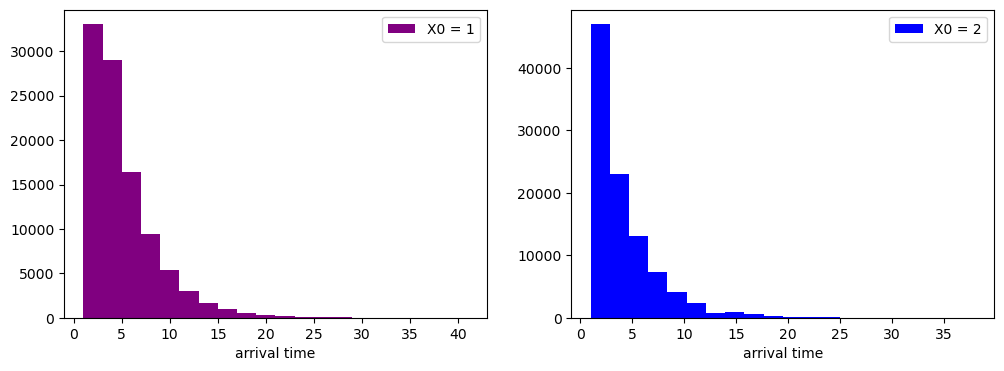

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes = axes.flatten()

axes[0].hist(arrival_times_1, bins=20, color='purple', label='X0 = 1')
axes[1].hist(arrival_times_2, bins=20, color='blue', label='X0 = 2')
axes[0].legend()
axes[1].legend()

axes[0].set_xlabel('arrival time')
axes[1].set_xlabel('arrival time')
plt.show()

In [17]:
x1_mean = np.mean(arrival_times_1)
x2_mean = np.mean(arrival_times_2)

print(f"mean arrival time if start from node1: {x1_mean}")
print(f"mean arrival time if start from node2: {x2_mean}")

mean arrival time if start from node1: 4.60834
mean arrival time if start from node2: 3.83162
